<a href="https://colab.research.google.com/github/Jakhongir0103/ML_learning/blob/main/Simple_Linear_regression_by_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear regression by hand

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
housing = df[df.district=='Чиланзарский']
housing.drop(index=housing[housing.price == 'Договорная'].index, inplace=True)

In [ ]:
housing['size'] = pd.to_numeric(housing['size'])
housing['price'] = pd.to_numeric(housing['price'])

In [ ]:
housing.drop(index=housing[housing.price > 200000].index, inplace=True)
housing.drop(index=housing[housing['size'] > 200].index, inplace=True)

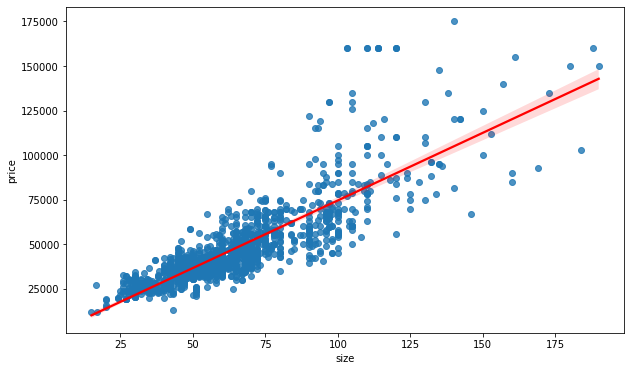

In [42]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [43]:
X = np.asanyarray(housing[['size']])
Y = np.asanyarray(housing[['price']])

In [44]:
x_mean = X.mean()
y_mean = Y.mean()

In [65]:
theta1 = sum((X-x_mean)*(Y-y_mean)) / sum((X-x_mean)**2)
theta0 = y_mean - theta1 * x_mean
print(f'theta0={theta0}')
print(f'theta1={theta1}')

theta0=[-1282.42643634]
theta1=[758.57112789]


In [67]:
def simp_regression(x):
  return theta0 + theta1 * x

In [68]:
y_predicted = simp_regression(X)

### root mean squared error

In [69]:
rmse = np.sqrt(np.sum((y_predicted-Y)**2)/len(y_predicted))
print(f'RMSE: {rmse}')

RMSE: 11788.524949918552


# Simple linear regression with sklearn

In [26]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(housing, test_size=0.1, random_state=42)

In [57]:
X_tr = np.asanyarray(train[['size']])
Y_tr = np.asanyarray(train[['price']])

In [70]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

LR_model.fit(X_tr, Y_tr)

theta1_model = LR_model.coef_[0][0]
theta0_model = LR_model.intercept_[0]

In [66]:
print(f'theta0={theta0}')
print(f'theta1={theta1}')

theta0=[-1282.42643634]
theta1=[758.57112789]


In [71]:
X_ts = np.asanyarray(test[['size']])
Y_ts = np.asanyarray(test[['price']])

In [72]:
y_model_predicted = LR_model.predict(X_ts)

In [73]:
from sklearn.metrics import mean_squared_error
rmse_model = np.sqrt(mean_squared_error(Y_ts, y_model_predicted))
print(f'RMSE: {rmse_model}')

RMSE: 113713.35977620402
